<a href="https://colab.research.google.com/github/filladani/PCVK_2024/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

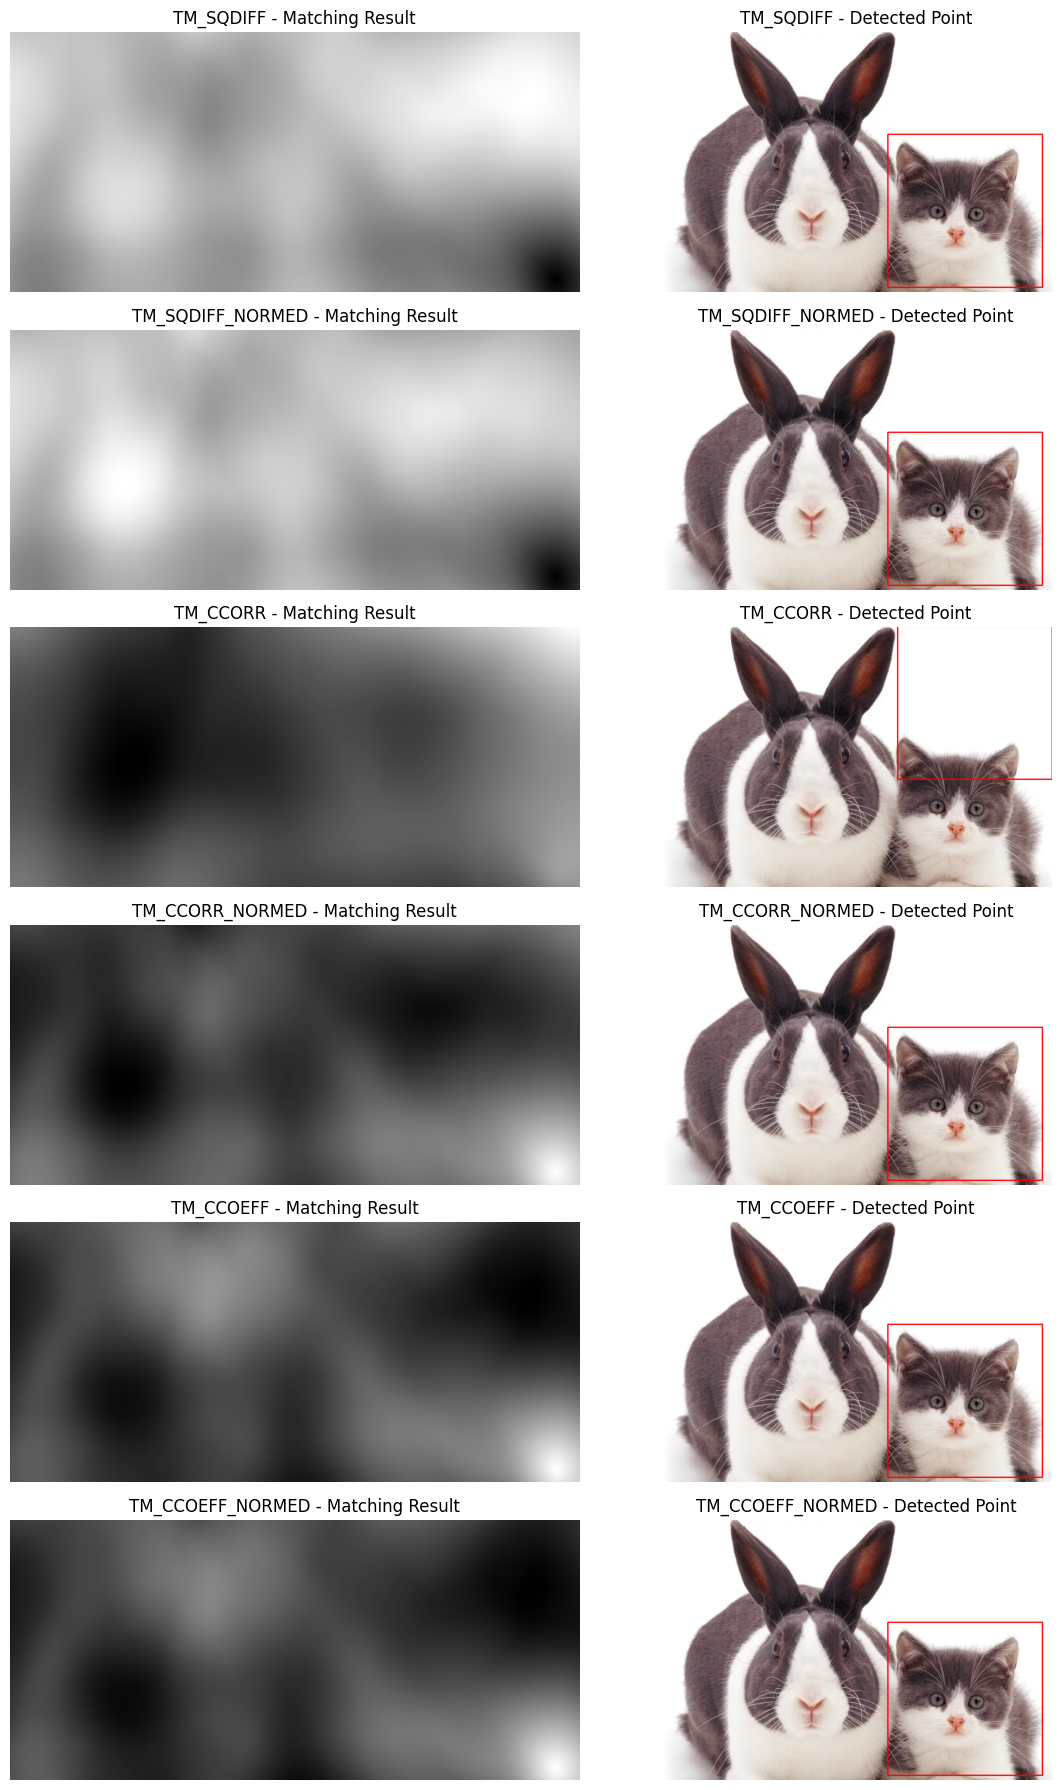

In [6]:
# Memuat gambar dan template dalam warna
image = cv2.imread('/content/drive/MyDrive/PCVK/images/cats_and_bunnies.jpg')
template = cv2.imread('/content/drive/MyDrive/PCVK/images/cats_template.jpg', cv2.IMREAD_GRAYSCALE)

# Ukuran template
w, h = template.shape[::-1]

# Definisikan metode template matching
methods = [
    ('TM_SQDIFF', cv2.TM_SQDIFF),
    ('TM_SQDIFF_NORMED', cv2.TM_SQDIFF_NORMED),
    ('TM_CCORR', cv2.TM_CCORR),
    ('TM_CCORR_NORMED', cv2.TM_CCORR_NORMED),
    ('TM_CCOEFF', cv2.TM_CCOEFF),
    ('TM_CCOEFF_NORMED', cv2.TM_CCOEFF_NORMED)
]

# Lakukan template matching untuk setiap metode dan tampilkan hasilnya
plt.figure(figsize=(12, 18))
for i, (method_name, method) in enumerate(methods):
    # Salin gambar asli untuk menampilkan hasil
    img_copy = image.copy()

    # Ubah gambar utama menjadi grayscale untuk template matching
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplikasikan template matching pada gambar grayscale
    result = cv2.matchTemplate(image_gray, template, method)

    # Temukan lokasi terbaik berdasarkan metode
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # TM_SQDIFF dan TM_SQDIFF_NORMED menggunakan lokasi minimum, sisanya maksimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Tentukan koordinat kotak pembatas (bounding box)
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 2)

    # Tampilkan hasil pencocokan dan deteksi pada gambar asli
    plt.subplot(len(methods), 2, 2*i + 1)
    plt.imshow(result, cmap='gray')
    plt.title(f"{method_name} - Matching Result")
    plt.axis('off')

    plt.subplot(len(methods), 2, 2*i + 2)
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title(f"{method_name} - Detected Point")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

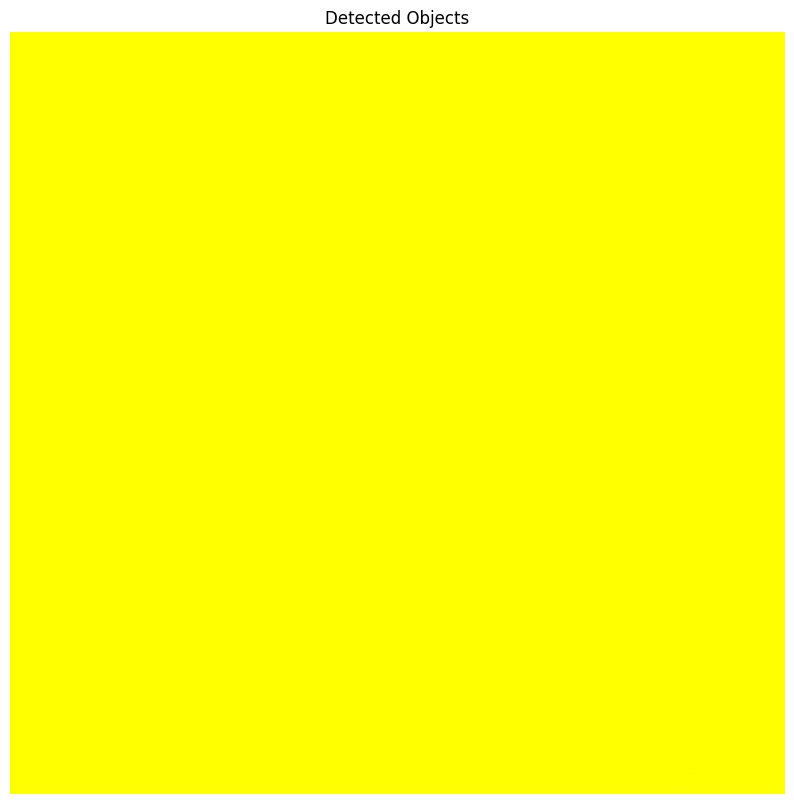

In [8]:
# Fungsi untuk menghitung korelasi antara template dan sebagian gambar
def template_match(input_image, template):
    # Dapatkan ukuran gambar dan template
    img_h, img_w = input_image.shape
    tpl_h, tpl_w = template.shape

    # Ukuran hasil korelasi
    output_h = img_h - tpl_h + 1
    output_w = img_w - tpl_w + 1

    # Hasil korelasi
    correlation = np.zeros((output_h, output_w))

    # Looping untuk menggeser template ke seluruh bagian gambar
    for y in range(output_h):
        for x in range(output_w):
            # Hitung nilai korelasi
            region = input_image[y:y + tpl_h, x:x + tpl_w]
            correlation[y, x] = np.sum(region * template)

    return correlation

# Fungsi untuk mendeteksi posisi terbaik berdasarkan threshold
def detect_objects(correlation, threshold=0.9):
    detected_positions = []
    max_value = correlation.max()

    # Normalisasi hasil korelasi
    correlation = correlation / max_value

    # Deteksi posisi yang memenuhi threshold
    for y in range(correlation.shape[0]):
        for x in range(correlation.shape[1]):
            if correlation[y, x] >= threshold:
                detected_positions.append((x, y))

    return detected_positions

# Memuat gambar input dan template
input_image = np.array(Image.open('/content/drive/MyDrive/PCVK/images/bahrain.jpg').convert('L'))
template = np.array(Image.open('/content/drive/MyDrive/PCVK/images/bahrain-template.jpg').convert('L'))

# Melakukan template matching
correlation = template_match(input_image, template)

# Mendapatkan posisi deteksi berdasarkan threshold tertentu
detected_positions = detect_objects(correlation, threshold=0.8)

# Plot gambar asli dan hasil deteksi
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(input_image, cmap='gray')
ax.set_title('Detected Objects')

# Ukuran template untuk menggambar bounding box
tpl_h, tpl_w = template.shape

# Menambahkan kotak pada posisi yang terdeteksi
for (x, y) in detected_positions:
    rect = plt.Rectangle((x, y), tpl_w, tpl_h, edgecolor='yellow', linewidth=2, facecolor='none')
    ax.add_patch(rect)

plt.axis('off')
plt.show()

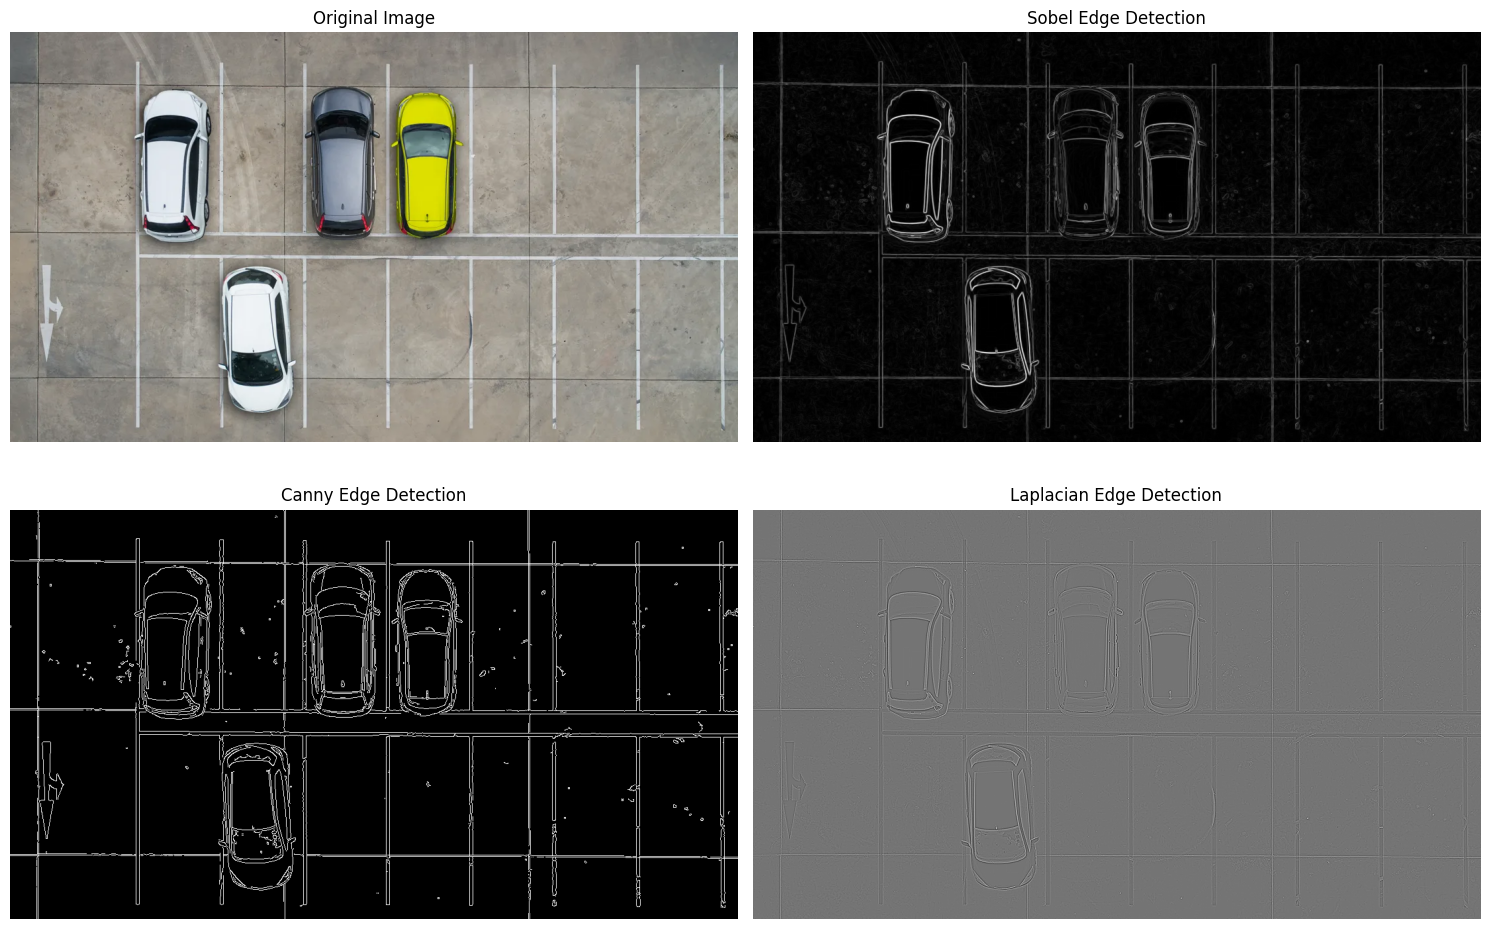

In [9]:
# Baca gambar
image_path = '/content/drive/MyDrive/PCVK/images/car-park.jpg'  # Sesuaikan path dengan lokasi gambar Anda di Colab
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Konversi gambar ke skala abu-abu
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sobel Edge Detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Canny Edge Detection
canny_edges = cv2.Canny(gray_image, 100, 200)

# Laplacian Edge Detection
laplacian_edges = cv2.Laplacian(gray_image, cv2.CV_64F)

# Tampilkan hasil
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

<ipython-input-10-3ce8973ab40e>:15: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


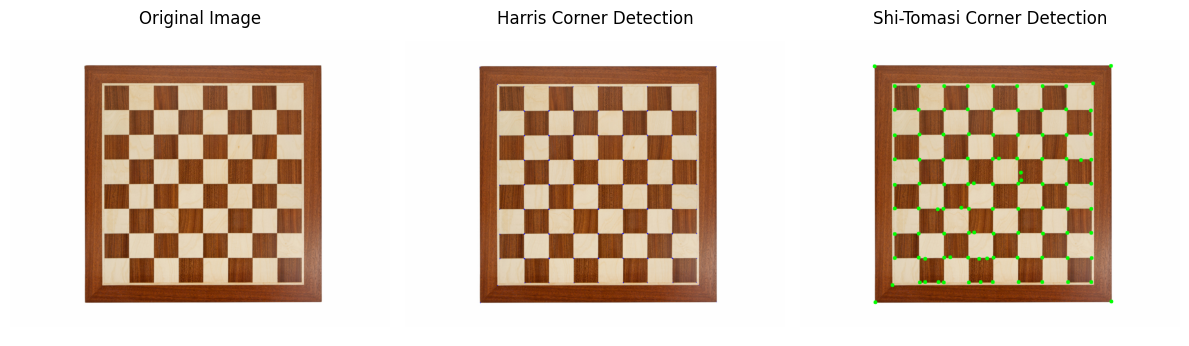

In [10]:
# Memuat gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/images/chess-board.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Deteksi sudut menggunakan metode Harris Corner Detection
gray_harris = np.float32(gray)
harris_corners = cv2.cornerHarris(gray_harris, blockSize=2, ksize=3, k=0.04)

# Mempertebal titik sudut pada hasil Harris Corner Detection
image_harris = image.copy()
image_harris[harris_corners > 0.01 * harris_corners.max()] = [255, 0, 0]  # Warna merah untuk titik Harris

# Deteksi sudut menggunakan metode Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

# Plot hasil Shi-Tomasi Corner Detection
image_shi_tomasi = image.copy()
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image_shi_tomasi, (x, y), 5, (0, 255, 0), -1)  # Warna hijau untuk titik Shi-Tomasi

# Tampilkan hasil
plt.figure(figsize=(12, 6))

# Menampilkan gambar asli
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Menampilkan hasil Harris Corner Detection
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_harris, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')

# Menampilkan hasil Shi-Tomasi Corner Detection
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_shi_tomasi, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

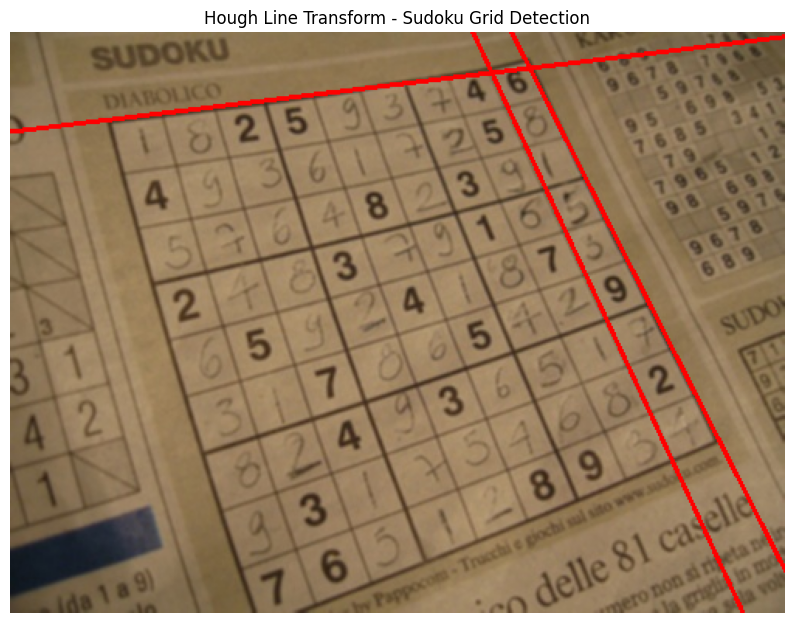

In [14]:
# Baca gambar
image_path = '/content/drive/MyDrive/PCVK/images/sudoku.jpg'  # Sesuaikan path dengan lokasi gambar Anda di Colab
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Deteksi tepi menggunakan Canny Edge Detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Hough Line Transform untuk mendeteksi garis
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Gambar garis pada gambar asli
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Tampilkan hasil
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Hough Line Transform - Sudoku Grid Detection')
plt.axis('off')
plt.show()

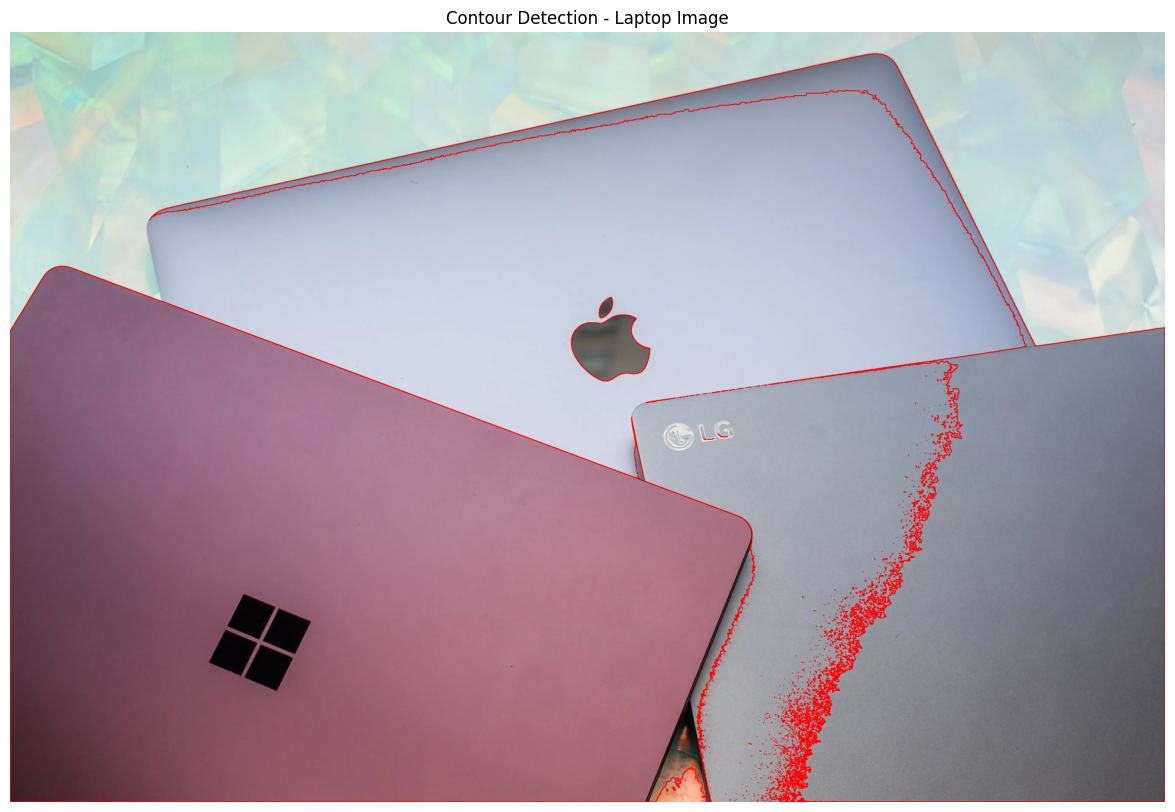

In [16]:
# Baca gambar
image_path = '/content/drive/MyDrive/PCVK/images/laptop.jpg'  # Sesuaikan path dengan lokasi gambar Anda di Colab
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Lakukan thresholding untuk mempermudah deteksi kontur
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Deteksi kontur
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
image_contours = image.copy()
cv2.drawContours(image_contours, contours, -1, (0, 0, 255), 2)

# Tampilkan hasil
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection - Laptop Image')
plt.axis('off')
plt.show()

# Pengayaan Materi KTP

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from google.colab.patches import cv2_imshow

In [18]:
path_plate = ('/content/drive/MyDrive/PCVK_MM/Images/ktp/dataset/sliced')

#Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
 src = cv2.imread(os.path.join(path_plate, name_file))
 blurred = src.copy()
 gray = blurred.copy()

 # Filtering
 for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

  # Ubah ke grayscale
 original = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
 gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
 ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
 print(ret, bw.shape)

  # Proses Morfologi
 kernel = np.ones((2,2),np.uint8)
 closing = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

 contours, _ = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
 result = original.copy()

 for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if w > 10 and h > 10:
   result = cv2.rectangle(original, (x, y), (x+w, y+h),(255,0,0),1)

 plt.figure(figsize=(20,15))
 plt.subplot(131),plt.imshow(bw, cmap='gray'),plt.title('Greyscale')
 plt.xticks([]), plt.yticks([])
 plt.subplot(132),plt.imshow(closing, cmap='gray'),plt.title('Greyscale Morfologi')
 plt.xticks([]), plt.yticks([])
 plt.subplot(133),plt.imshow(original),plt.title('Ekstraksi Kontur')
 plt.xticks([]), plt.yticks([])
 plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PCVK/images/dataset/sliced'